In [10]:
import torch
print(torch.__version__)

2.0.1+cu118


MEAN AND STANDARD DEVIATION

In [11]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [12]:
os.listdir()

['.config', 'drive', 'sample_data']

In [13]:
os.listdir('./drive/MyDrive/archive/training/training')

['n5', 'n6', 'n2', 'n4', 'n3', 'n9', 'n7', 'n8', 'n1', 'n0']

In [14]:
training_dataset_path = './drive/MyDrive/archive/training/training'
training_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path , transform = training_transforms )

In [15]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset , batch_size = 32 , shuffle = False )

In [16]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader :
        image_count_in_a_batch = images.size(0)

        images = images.view(image_count_in_a_batch , images.size(1),-1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch

        mean /= total_images_count
        std /= total_images_count

        return mean , std

In [17]:
get_mean_and_std(train_loader)

(tensor([0.4443, 0.4719, 0.3345]), tensor([0.2347, 0.2460, 0.2350]))

DATA LOADING AND TRANSFORMS

In [18]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [19]:
training_dataset_path = './drive/MyDrive/archive/training/training'
test_dataset_path = './drive/MyDrive/archive/validation/validation'

In [20]:
#image = (image - mean) / std

mean = [0.4443, 0.4719, 0.3345]
std =  [0.2347, 0.2460, 0.2350]

train_transforms = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean) ,torch.Tensor(std) )

    ])

test_transforms = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean) ,torch.Tensor(std) )

    ])

In [21]:
test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path , transform = test_transforms)
train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path , transform = train_transforms)

In [22]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=9, shuffle=True)

    # Get a batch of data
    batch = next(iter(loader))
    images, labels = batch

    # Create a grid of images
    grid = torchvision.utils.make_grid(images, nrow=3)

    # Display the grid using Matplotlib
    plt.figure(figsize=(11, 11))
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.axis('off')  # Turn off axis labels

    print('labels:', labels)

labels: tensor([5, 0, 8, 8, 2, 6, 3, 0, 0])


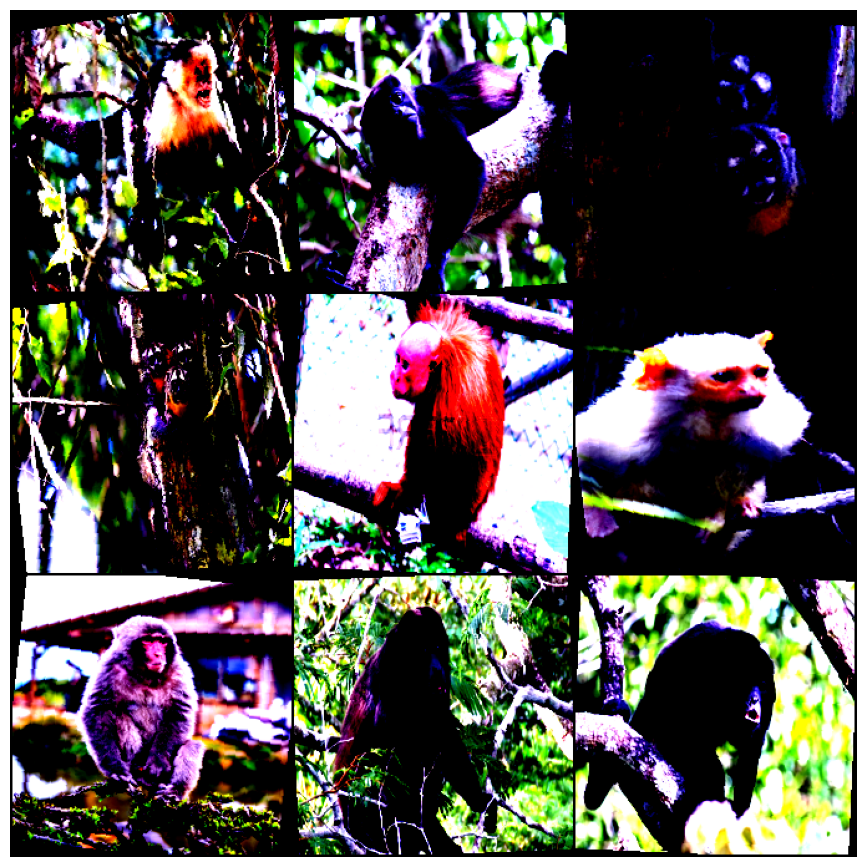

In [23]:
show_transformed_images(train_dataset)

In [24]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

TRAINING OF THE NEURAL NETWORK

SET DEVICE FUNCTION :

In [25]:
import torch
def set_device():
    if torch.cuda.is_available():
        dev = "cuda:0"
    else:
        dev = "cpu"
    return torch.device(dev)

def main():
    return set_device()

device = main()
print(device)


cuda:0


TRAIN NN FUNCTION :

In [ ]:
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs) :

In [26]:
#so to do define train_nn function we need to know about some of the terms used in it
#such as model , criterion , optimizer , noof epoches

# Model ---> resnet18
# Criterion ---> lossFunction(CrossEntropy)
# Optimizer ---> SGD (Stochastic Gradient Descent)

import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torch

# Load the pre-trained ResNet-18 model
resnet18_model = models.resnet18(pretrained=True)
num_features = resnet18_model.fc.in_features
num_classes = 10

# Replace the fully connected layer (classifier) of the model
resnet18_model.fc = nn.Linear(num_features, num_classes)

# Set the device for training (assuming you have a GPU)
device = set_device()
resnet18_model = resnet18_model.to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [ ]:
""" As of now we have known about the parameters of the function now
    lets make a function named train_nn """

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Normalize, Compose, Grayscale
from tqdm import tqdm
global best_acc
best_acc = 0
# Load the pre-trained ResNet-18 model
resnet18_model = models.resnet18(pretrained=True)
num_features = resnet18_model.fc.in_features
num_classes = 10

# Replace the fully connected layer (classifier) of the model
resnet18_model.fc = nn.Linear(num_features, num_classes)

# Set the device for training (assuming you have a GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet18_model = resnet18_model.to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)



# Define the training function
def train_nn(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Loop over epochs
    for epoch in range(num_epochs):
        model.train()  # Set the model in training mode
        running_loss = 0.0
        running_correct = 0.0
        total = 0

        # Create a progress bar for the training loop
        train_progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

        # Training loop for each batch
        for inputs, labels in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the selected device
            total += labels.size(0)  # Accumulate the total number of images in the batch

            optimizer.zero_grad()  # Clear accumulated gradients from previous iteration

            outputs = model(inputs)  # Forward pass to get predictions

            _, predicted = outputs.max(1)  # Get the index of the maximum output as predicted class

            loss = criterion(outputs, labels)  # Calculate the loss using specified loss function

            loss.backward()  # Backpropagation to compute gradients

            optimizer.step()  # Update model parameters using computed gradients

            running_loss += loss.item()  # Accumulate loss for the epoch
            running_correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)  # Calculate average loss for the epoch
        epoch_acc = 100.0 * running_correct / total  # Calculate accuracy for the epoch in percentage

        # Update progress bar description with loss and accuracy
        train_progress.set_postfix(loss=f"{epoch_loss:.3f}", acc=f"{epoch_acc:.2f}%")

        # Print training progress for this epoch
        print(f" - Training dataset. Got {running_correct} out of {total} images correctly ({epoch_acc:.3f}%). Epoch loss: {epoch_loss:.3f}")

        # Evaluate the model on the test set
        test_dataset_acc = evaluate_model_on_test_set(model, test_loader)  # Call the evaluation function
        best_acc = 0
        if (test_dataset_acc > best_acc):
          best_acc = test_dataset_acc
          save_checkpoint(model,epoch,optimizer,best_acc) #Call the save checkpoint function

    print("FINISHED")
    return model

In [38]:
# Define the evaluation function
def evaluate_model_on_test_set(model, test_loader):
    model.eval()

    predicted_correctly_on_epoch = 0
    total = 0
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predicted_correctly_on_epoch += (predicted == labels).sum().item()

    epoch_acc = 100.0 * predicted_correctly_on_epoch / total
    print(f"Testing dataset. Got {predicted_correctly_on_epoch} out of {total} images correctly ({epoch_acc:.4f})")

    return epoch_acc

In [39]:
import torch

def save_checkpoint(model, epoch, optimizer, best_acc):
    state = {
        'epoch': epoch + 1,
        'model': model.state_dict(),
        'best_accuracy': best_acc,
        'optimizer': optimizer.state_dict(),
        'comments': 'very cool model',
    }
    torch.save(state, 'model_best_checkpoint.pth.tar')


In [41]:
# Call the training function
num_epochs = 5

trained_model = train_nn(resnet18_model, train_loader, test_loader, loss_fn, optimizer, num_epochs)

 - Training dataset. Got 1080.0 out of 1097 images correctly (98.450%). Epoch loss: 0.037
Testing dataset. Got 261 out of 272 images correctly (95.9559)


 - Training dataset. Got 1089.0 out of 1097 images correctly (99.271%). Epoch loss: 0.028
Testing dataset. Got 254 out of 272 images correctly (93.3824)


 - Training dataset. Got 1090.0 out of 1097 images correctly (99.362%). Epoch loss: 0.023
Testing dataset. Got 266 out of 272 images correctly (97.7941)


 - Training dataset. Got 1092.0 out of 1097 images correctly (99.544%). Epoch loss: 0.014
Testing dataset. Got 263 out of 272 images correctly (96.6912)


 - Training dataset. Got 1094.0 out of 1097 images correctly (99.727%). Epoch loss: 0.012
Testing dataset. Got 265 out of 272 images correctly (97.4265)
FINISHED


In [43]:
import torch

# Load the checkpoint from the file
checkpoint = torch.load('model_best_checkpoint.pth.tar')

# Print the epoch from the checkpoint
print(checkpoint['epoch'])

# Print the comments from the checkpoint
print(checkpoint['comments'])

# Print the value associated with the key 'best accuracy' from the checkpoint
print(checkpoint['best_accuracy'])


5
very cool model
97.42647058823529


SAVING THE FILE

In [45]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load the ResNet-18 model
resnet18_model = models.resnet18()
num_ftrs = resnet18_model.fc.in_features
number_of_classes = 10

# Modify the classifier
resnet18_model.fc = nn.Linear(num_ftrs, number_of_classes)

# Load the state dict from the checkpoint
resnet18_model.load_state_dict(checkpoint['model'])

# Save the modified model
torch.save(resnet18_model, 'best_model.pth')


LOADING AND CLASSFIYING USING THE SAVED MODEL

In [46]:
import torchvision
import torch
import torchvision.transforms as transforms
from PIL import Image





In [47]:
classes = [
    "Mantled Howler",
    "Patas Monkey",
    "Bald Uakari",
    "Japanese Macaque",
    "Pygmy Marmoset",
    "White Headed Capuchin",
    "Silvery Marmoset",
    "Common Squirrel Monkey",
    "Black Headed Night Monkey",
    "Nilgiri Langur"
]

In [48]:

model = torch.load('best_model.pth')

In [49]:
# Define the mean and std values
mean = (0.4363, 0.4328, 0.3291)
std = (0.2129, 0.2075, 0.20381)

# Define the image transforms
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])


In [50]:
def classify(model, image_transforms, image_path, classes):
    model.eval()

    image = Image.open(image_path)
    image = image_transforms(image).float()
    image = image.unsqueeze(0)

    output = model(image)
    _, predicted = torch.max(output.data, 1)

    print(classes[predicted.item()])


In [52]:
classify(model, image_transforms, "JAPANESE MONKEY.jpg" , classes)

Japanese Macaque


In [54]:
classify(model, image_transforms, "NILGIRI.jpg" , classes)

Patas Monkey


In [55]:
classify(model, image_transforms, "baby-squirrel-monkey.jpg" , classes)

Common Squirrel Monkey
